In [1]:
import random
import math
import copy
import numpy as np
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
#Variables

In [3]:
N = 20  # Tamaño de la Red
t = 60000 # Números de pasos
E_t = [9999] * t # Matriz que guardará las energías
M_t = [9999] * t  # Matriz que guardará la magnetización
Steps = [9999] * t # Matriz que guardará los pasos


kb = 1 # Constante de 
J = 1 # Constante de
Tc = (2*J)/(kb*math.asinh(1))
#T = 0.5*Tc
N_tem = 30
Tf=[0] * N_tem
Rang_Tem = 1

minInc = 0.01  # Lo usaré para ver el Plateau
Punto_estable = 9999


E_prom = 0.0
M_prom = 0.0

In [4]:
#variacion de Temperatura

In [5]:
for k in range(N_tem):
    if k < N_tem / 2:
        T_antes = Tc * (1- (random.random())) # rango entre 0 y Tc
        if T_antes != 0 :
            Tf[k] = T_antes
        else: 
            Tf[k]=1000000
    else:
        Tf[k] = Tc * (1+ (Rang_Tem * random.random()))

# Ordenar el vector Tf de menor a mayor
Tf = sorted(Tf)

In [6]:

NumA = np.random.random((N,N))
RedOriginal = np.zeros((N, N))
RedOriginal[NumA>=0.5] = 1 # amarillo
RedOriginal[NumA<0.5] = -1 # negro
Red_inicial=np.copy(RedOriginal)
RedSinCambios=np.copy(RedOriginal)
#plt.imshow(RedOriginal, cmap='cividis')



In [7]:
#Ilustración de la Red inicial

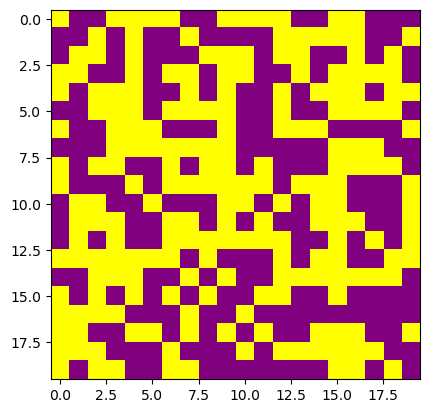

In [8]:
cmap = ListedColormap(['purple', 'yellow'])
# Crea una figura y un eje
fig, ax = plt.subplots()

# Dibuja la matriz inicial
im = ax.imshow(Red_inicial, cmap=cmap, animated=True)

# Muestra la animación
plt.show()

## Algoritmo metropolis, Energía, magnetizació de la red y promedio.

In [9]:
#progress_bar = tqdm(total=t, desc="Progreso")
frames = [] 


def metropolis(temp, lista):
   
    for k in range(t):
        
        E_t[k] = Energy(lista)
        M_t[k] = Mag(lista)
        Steps[k] = k
        
        x = random.randint(0, N-1)
        y = random.randint(0, N-1)

        Red_old =  copy.deepcopy(lista)
        E_old =  Energy(Red_old)
        
        # Invierto el Spin
        lista[x][y] = -lista[x][y]

        Red_new = lista

        E_new =  Energy(Red_new)

        # Calculamos la diferencia de energía
        DeltaE = E_new - E_old

        #print("\n")
        #print(f"Energía antigua {E_old} y nueva energía {E_new}; La diferencia es {DeltaE}")

        # Actualiza la barra de progreso
        #progress_bar.update(1)

        if DeltaE <= 0:
            lista = copy.deepcopy(Red_new)

        else:
            p = random.random()
            p_theory = math.exp(-(DeltaE)/(kb*temp))
            #print(f"Este es el valor de p {p} y este el de p_theory {p_theory}")

            if p < p_theory:
                lista = copy.deepcopy(Red_new)    
            else:
                lista = copy.deepcopy(Red_old)

        frames.append(copy.deepcopy(lista))

    return lista
        
        
# Funciones: Energía y Magnetización
def Energy(RedX):
    Etotal=0
    Energiatotal=0
    for i in range(N):
        
        #print("\n")
        
        for j in range (N):
            
            # Vecinos: arriba, abajo, izquierda y derecha
            neighbors = [
                RedX[(i - 1) % N][j],  # Arriba
                RedX[(i + 1) % N][j],  # Abajo
                RedX[i][(j - 1) % N],  # Izquierda
                RedX[i][(j + 1) % N]   # Derecha
            ]

            
            # Calcular la contribución de energía de este sitio
            E =-J * RedX[i][j] * sum(neighbors)
            
            """
            Estamos en {i,j}, los 4 vecinos son arriba {(i - 1) % N, j}; abajo {(i + 1) % N, j}; izquierda {i, (j - 1) % N}; derecha {i, (j + 1) % N} y la suma de vecinos es {sum(neighbors)}")
            print(E)
            """
            
            Energiatotal+=E 
            Etotal = Energiatotal/2
        
    #print(Etotal)
    return Etotal

def Mag(RedX):
    
    Mtotal = 0
    for j in range(N):
        for i in range (N):
            Mtotal += RedX[i][j]
            
    #print(Mtotal)
    return Mtotal

#lista2 = metropolis(T,A)
#lista2 = metropolis(5,Red_inicial)
print("Listo")

Listo


In [10]:
def promedio(lista):
    prom = sum(lista[-6000:])/(60000*N*N)
    return prom


### Guardando cada valor promedio de la magnetización

In [11]:
promedios_magnetismo = [0] * N_tem

for k in range(N_tem):
    #metropolis(Tf[k],A)
    metropolis(Tf[k],Red_inicial)
    promedios_magnetismo[k] = promedio(M_t)
    

    #print(k,Tf[k])
#print(promedios_magnetismo)

### Graficas

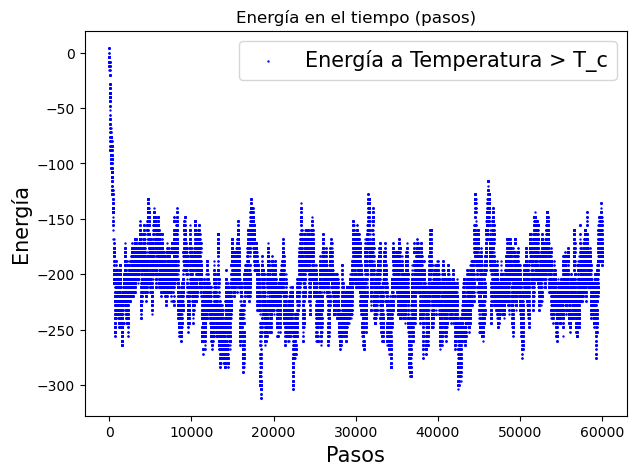

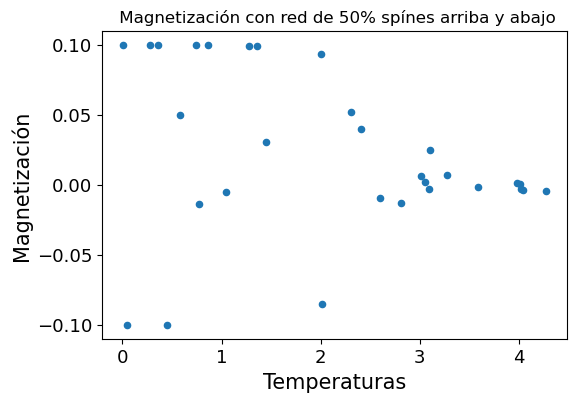

In [12]:
plt.figure(figsize=(7, 5))
plt.scatter(Steps, E_t, s=2.0, label='Energía a Temperatura > T_c', color='blue', marker='.')
plt.title('Energía en el tiempo (pasos)')
plt.xlabel('Pasos', fontsize=15)
plt.ylabel('Energía', fontsize=15)
plt.legend(fontsize=15)
mpl.rcParams['xtick.labelsize'] = 13  # Tamaño de fuente para el eje x
mpl.rcParams['ytick.labelsize'] = 13  # Tamaño de fuente para el eje y

# Mostrar el gráfico
plt.show()


# GRAFICA PROMEDIOS MAGNETIZACION
plt.figure(figsize=(6, 4))
plt.scatter(Tf, promedios_magnetismo, s=20)
# Personalizar el gráfico
plt.title(' Magnetización con red de 50% spínes arriba y abajo')#condición inicial
plt.xlabel('Temperaturas',fontsize=15)
plt.ylabel('Magnetización', fontsize=15)
#plt.legend(fontsize=12)

mpl.rcParams['xtick.labelsize'] = 15  # Tamaño de fuente para el eje x
mpl.rcParams['ytick.labelsize'] = 15  # Tamaño de fuente para el eje y

plt.show()


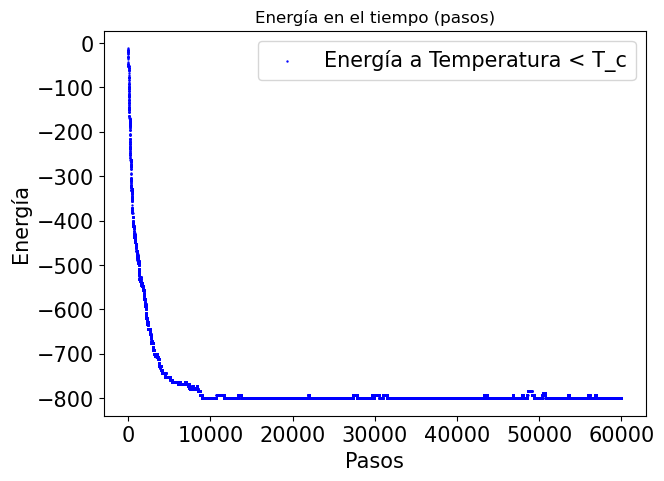

In [13]:
metropolis(1, RedSinCambios)
plt.figure(figsize=(7, 5))
plt.scatter(Steps, E_t, s=2.0, label='Energía a Temperatura < T_c', color='blue', marker='.')
plt.title('Energía en el tiempo (pasos)')
plt.xlabel('Pasos', fontsize=15)
plt.ylabel('Energía', fontsize=15)
plt.legend(fontsize=15)
mpl.rcParams['xtick.labelsize'] = 13  # Tamaño de fuente para el eje x
mpl.rcParams['ytick.labelsize'] = 13  # Tamaño de fuente para el eje y
# Mostrar el gráfico
plt.show()
